# Úkol č. 2 - Využití neuronových sítí

  * Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML2/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html).
  * Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>
  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    <br/><br/>
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Homework

## Importing modules & reading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

RND_SEED = 789
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [2]:
from sklearn.model_selection import train_test_split

target_col = 'label'
data = pd.read_csv('train.csv')

X = data.drop(columns=[target_col])
y = data[target_col]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.4, random_state=RND_SEED, shuffle=True
)

Xval, Xtest, yval, ytest = train_test_split(
    Xtest, ytest, test_size=0.5, random_state=RND_SEED, shuffle=True
)


print(f"Xtrain shape: {Xtrain.shape}");
Xtrain.head()

Xtrain shape: (31500, 1024)


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
11880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29683,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
33983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
def display_img(ax, x, y, kw_imshow = dict(cmap='binary', vmin=0, vmax=255), prefix_label='Label: '):
    x_ = x.reshape(32, 32)
    ret = ax.imshow(
        x_, 
        **kw_imshow
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{prefix_label}{y}")
    return ret

def display_gallery(X, Y):
    n = int(np.sqrt(X.shape[0]))
    m = int(np.ceil(X.shape[0] / n))
    fig, axes = plt.subplots(n, m, figsize=(m*3, n*3.))

    for ax, x, y in zip(axes.flatten(), X.iterrows(), Y):
        display_img(ax, x[1].values, y)
    for ax in axes.flatten()[X.shape[0]:]:
        ax.remove()

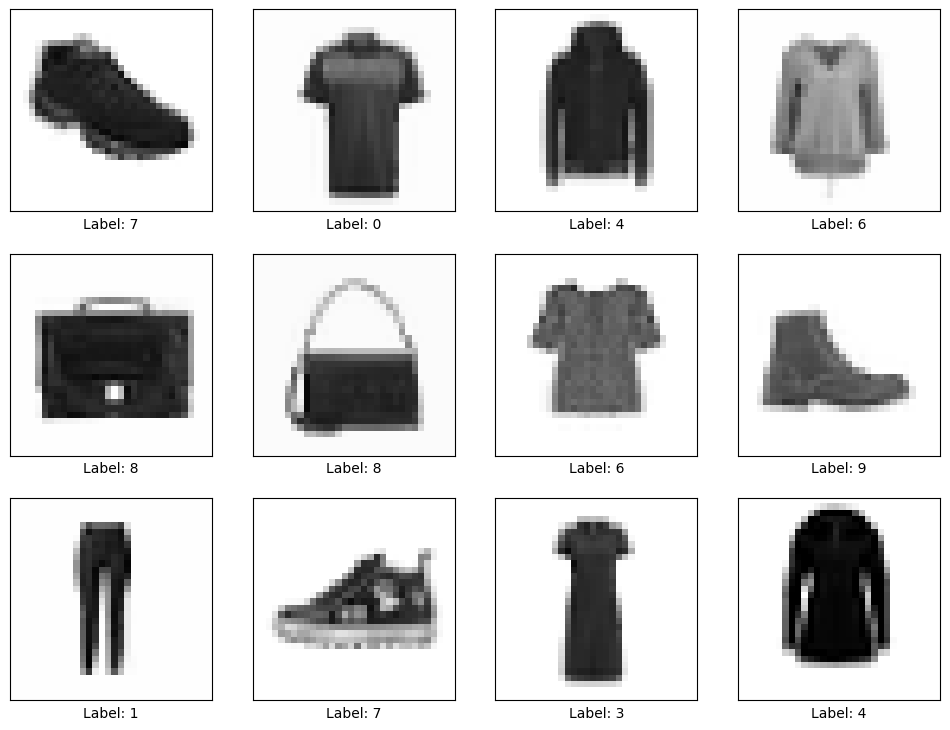

In [4]:
display_gallery(Xtrain.tail(12), ytrain.tail(12))

In [5]:
labels = np.sort(ytrain.unique())
label_rates = ytrain.groupby(ytrain).count() / ytrain.shape[0]
N_LABELS = len(labels)
LEN_SIDE = 32
print(f"Present labels are: {labels}")
print(f"Label rates: {label_rates}")

Present labels are: [0 1 2 3 4 5 6 7 8 9]
Label rates: label
0    0.101238
1    0.098730
2    0.100857
3    0.101302
4    0.100127
5    0.101143
6    0.100540
7    0.096444
8    0.098762
9    0.100857
Name: label, dtype: float64


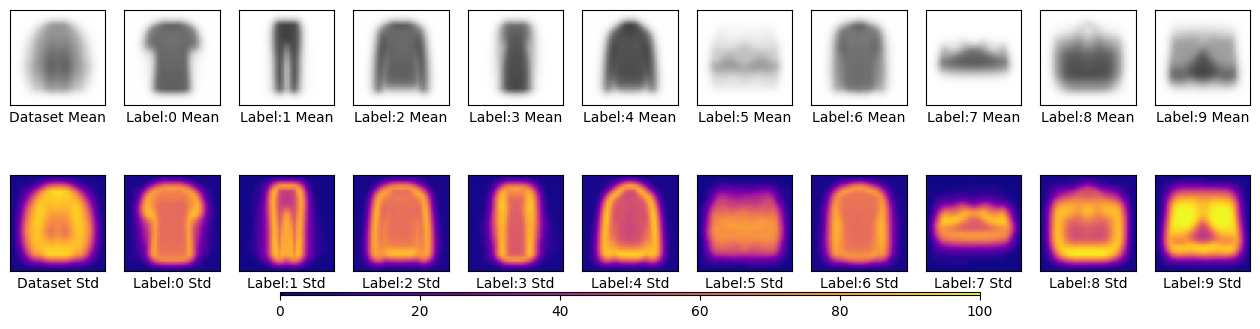

In [6]:
from matplotlib.cm import ScalarMappable
fig, [axm, axs] = plt.subplots(2, len(labels) + 1, figsize=(16, 4))


display_img(axm[0],  Xtrain.mean().values, 'Dataset Mean', prefix_label='')
for i in labels:
    display_img(axm[i + 1], Xtrain[ytrain == i].mean().values, f'Label:{i} Mean', prefix_label='')

display_img(axs[0],  Xtrain.std().values, 'Dataset Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')
for i in labels:
    display_img(axs[i + 1], Xtrain[ytrain == i].std().values, f'Label:{i} Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')

sm = ScalarMappable(cmap='plasma')
sm.set_clim(0, 100)
_=fig.colorbar(
    sm,
    ax=axs,
    location='bottom',
    aspect=200,
    fraction=0.025
)

## Training

In [7]:
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(Xtrain.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(ytrain.values, dtype=torch.long).to(device)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(Xval.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(yval.values, dtype=torch.long).to(device)
)

print(f"Training dataset length:   {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")

Training dataset length:   31500
Validation dataset length: 10500


In [8]:
BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [9]:
class EarlyStopper:

    def __init__(self, tolerance):
        self.counter = 0
        self.min = float('+inf')
        self.tolerance = tolerance

    def __call__(self, val) -> bool:
        """
            Returns true if training should be stopped
        """
        if self.min > val:
            self.min = val
            self.counter = 0
            return False
        self.counter += 1
        return self.counter >= self.tolerance

In [10]:
def train_one_epoch(model, optimizer, loss_fn, train_loader) -> tuple[float, float]:
    accumulated_loss = 0
    accumulated_correct_pred = 0
    total_samples = 0
    model.train()

    for data, label in train_loader:
        total_samples += data.shape[0]
        
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()

        accumulated_loss += data.shape[0] * loss.item()
        accumulated_correct_pred += (pred.argmax(dim=1) == label).sum().item()
    return accumulated_loss / total_samples, accumulated_correct_pred / total_samples

@torch.no_grad
def validate(model, loss_fn, val_loader) -> tuple[float, float]:
    accumulated_loss = 0
    accumulated_correct_pred = 0
    total_samples = 0
    model.eval()

    for data, label in val_loader:
        total_samples += data.shape[0]
        pred = model(data)
        loss = loss_fn(pred, label)
        accumulated_loss += data.shape[0] * loss.item()
        accumulated_correct_pred += (pred.argmax(dim=1) == label).sum().item()

    return accumulated_loss / total_samples, accumulated_correct_pred / total_samples

def train_model(
        model, optimizer_cls, epochs, early_stopper=None, 
        optimizer_kwargs={}, loss_fn=nn.CrossEntropyLoss(), 
        train_loader=train_loader, val_loader=val_loader,
        display_cldw=10
    ):

    optimizer = optimizer_cls(model.parameters(), **optimizer_kwargs)
    print("| Epoch || Loss                    || Accuracy                |")
    print("|       || Training   | Validation || Training   | Validation |")
    print("|-------||------------|------------||------------|------------|")
    
    for epoch in range(epochs):
        tloss, tacc = train_one_epoch(model, optimizer, loss_fn, train_loader)
        vloss, vacc = validate(model, loss_fn, train_loader)
        if epoch % display_cldw == 0 or epoch == (epochs - 1):
            print(f"| {epoch:>5} || {tloss:>10.7f} | {vloss:>10.7f} || {tacc:>10.7f} | {vacc:>10.7f} |")
        if early_stopper and early_stopper(vloss):
            print("| Earl Stopping |---------------------------------------------|")
            print(f"| {epoch:>5} || {tloss:>10.7f} | {vloss:>10.7f} || {tacc:>10.7f} | {vacc:>10.7f} |")
            break
        

In [11]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 128),
    nn.ReLU(),
    nn.Linear(128, N_LABELS),
    nn.Softmax(1)
).to(device)

In [12]:
train_model(
    model, torch.optim.SGD, 
    optimizer_kwargs=dict(
        lr=0.01
    ),
    epochs=500,
    early_stopper=EarlyStopper(25)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.1760857 |  2.1015749 ||  0.2842540 |  0.3590476 |
|    10 ||  2.0101173 |  2.0052786 ||  0.4505714 |  0.4556825 |
|    20 ||  2.0037136 |  1.9979992 ||  0.4572063 |  0.4629841 |
|    30 ||  2.0013058 |  2.0178965 ||  0.4596825 |  0.4431111 |


KeyboardInterrupt: 